#### Basketball Corpus Linguistic Analysis
The data in my linguistic analysis program is a mix of different articles and movie scripts, all based on <b>'basketball'</b>. These articles are about a range of topics regarding basketball; NBL games, NBA dunk contests, player's biography, fiction movie, predictive reports. Some of these articles I was able to find based on prior knowledge (e.g. Coach Carter is a movie I have watched many times), while some others I gathered through user's comments on a forum known as Reddit, all giving their own contributing vote on their 'favourite NBA articles'. I was able to directly copy and paste the texts from their given webpages which made the task a lot easier. All links are provided below to each text used.

<b>Links to Articles:</b>
- [Breakers beat Bullets to lock in NBL Finals spot](https://www.espn.com/nbl/story/_/id/39537989/nbl-new-zealand-breakers-beat-brisbane-bullets-lock-nbl-finals-spot)
- [NBA Finals: 5 takeaways as Celtics top Mavericks for 2024 championship](https://www.nba.com/news/celtics-mavericks-takeaways-game-5-2024-nba-finals)
- [Olgs' Notebook: Inside the strategy the Breakers are using to defy the odds](https://www.espn.com/nbl/story/_/id/42044856/olgs-notebook-nbl-strategy-breakers-using-defy-odds-dyson-daniels-delivering)
- [Coach Carter Script](http://www.script-o-rama.com/movie_scripts/c/coach-carter-script-transcript.html)
- [Michael Jordan Has Not Left The Building](http://www.espn.com/espn/feature/story?_slug_=michael-jordan-not-left-building&page=Michael-Jordan&redirected=true)
- [Illawarra Hawks coach Justin Tatum slams referees, Chris Goulding flop](https://www.espn.com/nbl/story/_/id/41983534/nbl-illawarra-hawks-coach-justin-tatum-slams-referees-chris-goulding-flop)
- [Mac McClung Wins 2024 NBA Slam Dunk Contest: Where Win Ranks All-Time](https://bleacherreport.com/articles/10109796-mac-mcclung-wins-2024-nba-slam-dunk-contest-where-win-ranks-all-time)
- [Nikola Jokic Was Already the Best Basketball Player Alive. Somehow, He’s Even Better Now](https://www.theringer.com/nba/2024/11/14/24295137/nikola-jokic-denver-nuggets-rebounds-assists-points)
- [The No-Stats All-Star](https://www.nytimes.com/2009/02/15/magazine/15Battier-t.html)
- [Remember When the NBA Dunk Contest Was Truly Awesome?](https://bleacherreport.com/articles/1943706-remember-when-the-nba-dunk-contest-was-truly-awesome)
- [Stephen Curry Is The Revolution](https://fivethirtyeight.com/features/stephen-curry-is-the-revolution/)
- [The Consequences of Caring](https://grantland.com/features/the-consequences-caring/)
- [The Malice at the Palace](https://grantland.com/features/an-oral-history-malice-palace/)

In [2093]:
from nltk.corpus import PlaintextCorpusReader, stopwords
from nltk.text import Text
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk import FreqDist
import nltk

from glob import glob

import matplotlib.pyplot as plt
from collections import Counter

import re

First off, I'll need to collate the text files into a large corpus. I will do this by getting the file names in the "Texts/" folder and creating a corpus with that folder as the root. This will then make a large Text corpus containing all of the texts. 

In [2094]:
filenames = glob('Texts/*') # get all the files in the Texts directory
file_ids = [name[len('Texts/'):] for name in filenames] # get the filenames without the directory
basketball_reports_corpus = PlaintextCorpusReader(  # create a corpus from the files
    root = 'Texts/', 
    fileids = file_ids
)
basketball_reports_text = Text(basketball_reports_corpus.words()) # create a text object from the corpus

I am then wanting to use the corpus to extract some information about the texts I am dealing with. First we will take a look at the total number of tokens in the corpus, as well as the number of unique types in the corpus.

In [2095]:
tokens = basketball_reports_corpus.words() # get all the tokens in the corpus
total_tokens = len(tokens)
unique_types = len(set(tokens))

print(f'Total number of tokens/words: {total_tokens}')
print(f'Total number of unique types/words: {unique_types}')

Total number of tokens/words: 76373
Total number of unique types/words: 6957


We can see that there is 76,388 different words/tokens in the whole corpus, with 6,959 unique words. This gives us a large corpus of text that we are able to analyse and work with! Now, lets take a look at the total number of tokens and unique types per text...

In [2096]:
# Count the total number of tokens and unique types in each file

text_metrics = {}

for file_id in file_ids:
    tokens = basketball_reports_corpus.words(file_id)
    total_tokens = len(tokens)
    unique_types = len(set(tokens))
    text_metrics[file_id] = {
        'total_tokens': total_tokens, # store the total number of tokens
        'unique_types': unique_types # store the total number of unique types
    }

for file_id, counts in text_metrics.items(): 
    print(f'File: {file_id}')
    print(f'Total number of tokens/words: {counts["total_tokens"]}')
    print(f'Total number of unique types/words: {counts["unique_types"]}')
    print()

File: 2024_breakers_final.txt
Total number of tokens/words: 673
Total number of unique types/words: 330

File: nikola_jokic_best.txt
Total number of tokens/words: 2045
Total number of unique types/words: 666

File: coach_carter_script.txt
Total number of tokens/words: 18651
Total number of unique types/words: 1955

File: the_consequences_of_caring.txt
Total number of tokens/words: 5198
Total number of unique types/words: 1397

File: 2024_nba_finals.txt
Total number of tokens/words: 2190
Total number of unique types/words: 775

File: jordan_has_not_left.txt
Total number of tokens/words: 9791
Total number of unique types/words: 2147

File: mac_mcclung_dunk_contest.txt
Total number of tokens/words: 566
Total number of unique types/words: 277

File: the_malice_at_the_palace.txt
Total number of tokens/words: 16591
Total number of unique types/words: 2240

File: stephen_curry_revolution.txt
Total number of tokens/words: 3479
Total number of unique types/words: 871

File: no_stats_allstar.txt

The Coach Carter script contains the most words out of all texts with 18,651, and the 'Michael Jordan Has Not Left The building' report has the most amount of unique words (2147). The 'Breakers beat Bullets to lock in NBL Finals spot' article has the highest percentage of unique words across the text of 49.03% ((total tokens / total unique tokens) * 100 ).

Now I'll get the average number of tokens and unique types across the texts...

In [2097]:
# get the average number of tokens and unique types

num_texts = len(text_metrics)

total_tokens_all_texts = 0
total_types_all_texts = 0

for counts in text_metrics.values():
    total_tokens_all_texts += counts['total_tokens'] # add the total number of tokens for each text 
    total_types_all_texts += counts['unique_types'] # add the total number of unique types for each text 

print(f'Average number of tokens: {total_tokens_all_texts / num_texts}')
print(f'Average number of unique types: {total_types_all_texts / num_texts}')

Average number of tokens: 5874.846153846154
Average number of unique types: 1136.6153846153845


Almost 1/5 of the tokens in the corpus will have around 1137 unique types of words, means that the average corpus with 5,875 tokens would see 19% of the corpus (1137 / 5875 = 19%) being unique words.

Lets look at the lexical diversity for each text, and the average lexical diversity across the texts...

In [2098]:
# get the lexical diversity for each text and the average lexical diversity

for file_id, counts in text_metrics.items():
    lexical_diversity = counts['unique_types'] / counts['total_tokens']
    text_metrics[file_id]['lexical_diversity'] = lexical_diversity # store the lexical diversity for each text

total_lexical_diversity = sum(counts['lexical_diversity'] for counts in text_metrics.values())
average_lexical_diversity = total_lexical_diversity / len(text_metrics)

for file_id, counts in text_metrics.items():
    print(f'File: {file_id}')
    print(f'Lexical diversity: {counts["lexical_diversity"]:.4f}')
    print()

print(f'Average lexical diversity of whole corpus: {average_lexical_diversity:.4f}')

File: 2024_breakers_final.txt
Lexical diversity: 0.4903

File: nikola_jokic_best.txt
Lexical diversity: 0.3257

File: coach_carter_script.txt
Lexical diversity: 0.1048

File: the_consequences_of_caring.txt
Lexical diversity: 0.2688

File: 2024_nba_finals.txt
Lexical diversity: 0.3539

File: jordan_has_not_left.txt
Lexical diversity: 0.2193

File: mac_mcclung_dunk_contest.txt
Lexical diversity: 0.4894

File: the_malice_at_the_palace.txt
Lexical diversity: 0.1350

File: stephen_curry_revolution.txt
Lexical diversity: 0.2504

File: no_stats_allstar.txt
Lexical diversity: 0.1870

File: breakers_strategy.txt
Lexical diversity: 0.3124

File: remember_the_dunk_contest.txt
Lexical diversity: 0.3679

File: justin_tatum_report.txt
Lexical diversity: 0.3354

Average lexical diversity of whole corpus: 0.2954


The text with the highest lexical diversity scores are the 2024 Breakers Final report, and the Mac McClung dunk contest win report (with a lexical diversity of 49%), meaning that the text is the least difficult to read of the lot, and likely more descriptive/analytical. The lowest lexical diversity scores come from the Coach Carter script (10.5%), and the Malice at the Palace report (13.5%) (likely due to much larger total tokens). With an overall average lexical diversity score of 29.5%, the corpus would likely be difficult to read and repetitive. 

Lets check out some of the frequency distribution functions and use it to make some assumptions about the corpus...

In [2099]:
# Clean up words to remove punctuation and convert to lowercase
basketball_reports_string = ' '.join(basketball_reports_text)

all_tokens_cleaned = re.sub(r'[^\w\s]', '', basketball_reports_string.lower()).split()

In [2100]:
# get the 10 most common words in the corpus

freq_dist = FreqDist(all_tokens_cleaned)

most_common_words = freq_dist.most_common(10) # get the 10 most common words

print("Most frequent words in the corpus:")
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')

Most frequent words in the corpus:
the: 3040
to: 1486
and: 1390
a: 1279
i: 1155
of: 1031
s: 951
you: 944
that: 930
in: 890


All of the 'Most frequent words in the corpus' do not come as a surprise to me as they are likely the most frequently used words in almost any dialogue/texts. This includes the frequency of punctuation in the corpus as well, so in terms of the actual 'words' persay, the most common do not come as a shock to me either as 'the', 'to', 'and', 'a', and 'I' are undeniably the most frequently used words in the English dictionary.

Now we'll check out the most frequent words in each of the texts individually...

In [2101]:
# Give the most frequent words in each text

freq_dists = {}

for file_id in file_ids:
    tokens = basketball_reports_corpus.words(file_id)
    tokens_string = ' '.join(tokens)
    tokens_cleaned = re.sub(r'[^\w\s]', '', tokens_string.lower()).split()
    freq_dist = FreqDist(tokens_cleaned)
    freq_dists[file_id] = freq_dist # store the frequency distribution for each text

for file_id, freq_dist in freq_dists.items():
    most_common_words = freq_dist.most_common(10) # get the 10 most common words
    print(f'Most frequent words in {file_id}:')
    for word, frequency in most_common_words:
        print(f'{word}: {frequency}')
    print()

Most frequent words in 2024_breakers_final.txt:
the: 29
in: 15
to: 12
a: 11
of: 10
s: 9
on: 9
points: 9
and: 9
we: 9

Most frequent words in nikola_jokic_best.txt:
the: 84
in: 47
jokic: 41
and: 35
a: 34
s: 33
to: 30
is: 28
season: 26
of: 25

Most frequent words in coach_carter_script.txt:
you: 629
i: 508
the: 414
to: 292
s: 285
that: 221
it: 204
a: 193
and: 188
t: 169

Most frequent words in the_consequences_of_caring.txt:
the: 188
and: 97
a: 84
i: 83
to: 81
s: 76
that: 74
it: 70
you: 67
of: 48

Most frequent words in 2024_nba_finals.txt:
the: 118
a: 63
and: 62
to: 42
of: 41
in: 36
was: 26
celtics: 24
that: 24
with: 22

Most frequent words in jordan_has_not_left.txt:
the: 401
he: 319
and: 211
to: 182
a: 181
his: 171
s: 138
in: 136
of: 136
jordan: 130

Most frequent words in mac_mcclung_dunk_contest.txt:
the: 30
a: 16
in: 13
to: 13
dunk: 12
of: 11
i: 9
and: 7
his: 7
that: 7

Most frequent words in the_malice_at_the_palace.txt:
the: 683
and: 428
to: 368
i: 334
that: 267
a: 266
was: 261
o

It is clear that the most frequent word across all of these texts is 'the' which is the most common stopword. The rest of the words vary in order but typically consists of 'and', 'a', 'to', 'of, 'was', and 'in'. There is the odd few frequent words that have correlations with basketball like 'dunk', 'shots', 'jordan', 'celtics', 'season' and more. 

Next I'll check out what the very infrequent words are in the overall corpus...

In [2102]:
# Give the very infrequent words in the corpus

freq_dist = FreqDist(all_tokens_cleaned)
infrequent_words = [word for word, frequency in freq_dist.items() if frequency == 1]

print("Very infrequent words in the corpus:")
print(infrequent_words)

Very infrequent words in the corpus:
['ensured', 'farewell', 'tour', '103', 'spurred', 'mid', 'announcement', 'auckland', 'offseason', 'dpoy', 'zylan', 'cheatham', 'izayah', 'le', 'afa', 'shone', 'contributed', 'lifting', 'adelaide', '36ers', 'focusing', 'homeparker', 'enthusiasm', 'whilst', 'pleasing', 'fate', '2019', 'hurting', 'schueller', 'photo', 'walter', 'gods', 'frustrating', 'unenviable', 'needing', 'bannan', 'outstanding', 'nathan', 'sobey', 'casey', 'prather', 'candidate', 'maintained', 'drained', 'capitalise', 'sloppy', 'leap', 'accomplished', 'ranking', 'metric', 'capture', 'upping', 'pts', 'reb', 'ast', 'doubles', 'scuffled', 'famers', 'century', 'rpg', 'apg', '4th', '1966', '67', '1964', '5th', '1957', '58', '1956', 'westbrook', 'ninth', 'happenstance', 'intent', 'nonzero', 'invent', 'rankings', 'updated', 'stuffing', 'sheet', 'realistically', 'jon', 'bois', 'experiment', '2k', 'factors', 'contribute', 'surge', 'spiked', 'mainly', 'inhaling', 'fruitful', 'cleaning', 'boo

The very infrequent words in the corpus do not come as a surprise, with none of them being a stopword. An example is ['izayah', 'le', 'afa'] which is the name of a talented Breakers player, Izayah Le Afa. It seems that a lot of names, adjectives, and numbers were classified as being infrequent words amongst the corpus. 

Now I will find and show the very infrequent words per text...

In [2103]:
# Give the very infrequent words per text

infrequent_words_per_text = {}

for file_id in file_ids:
    tokens = basketball_reports_corpus.words(file_id)
    tokens_string = ' '.join(tokens)
    tokens_cleaned = re.sub(r'[^\w\s]', '', tokens_string.lower()).split()
    freq_dist = FreqDist(tokens_cleaned) 
    infrequent_words = [word for word, frequency in freq_dist.items() if frequency == 1]
    infrequent_words_per_text[file_id] = infrequent_words 

for file_id, infrequent_words in infrequent_words_per_text.items():
    print(f'Very infrequent words in {file_id}:')
    print(infrequent_words)
    print()

Very infrequent words in 2024_breakers_final.txt:
['lock', 'illawarra', 'hawks', 'tatum', 'slams', 'referees', 'chris', 'goulding', 'flop', 'have', 'ensured', 'tom', 'farewell', 'tour', 'extend', 'an', 'emotion', 'charged', '103', '87', 'spurred', 'mid', 'week', 'announcement', 'locked', 'dominant', 'display', 'auckland', 'friday', 'phoenix', 'change', 'offseason', 'shea', 'ili', 'dpoy', 'guard', 'eight', 'while', 'zylan', 'cheatham', '19', 'izayah', 'le', 'afa', 'also', 'shone', 'club', 'legend', 'contributed', 'off', 'bench', 'including', 'lifting', 'triple', 'what', 'could', 'who', 'face', 'adelaide', '36ers', 'sunday', 'regular', 'finish', 'fourth', 'no', 'lower', 'than', 'means', 'retiring', 'veteran', 'dream', 'fifth', 'championship', 'round', 'stellar', 'alive', 'i', 'didn', 'want', 'this', 'call', 'distraction', 've', 'focusing', 'hand', 'easily', 'handle', 'homeparker', 'has', 'another', '8', 'impressive', 'going', 'tough', 'physical', 'so', 'bring', 'able', 'play', 'balance',

Next, I will have a look at the concordance of the word 'shoot'. I believe that I will find some interesting information in terms of what is associated with the word as in a basketball context, it refers to someone throwing the ball into the hoop, but that isn't the only context it could be used.

In [2104]:
basketball_reports_text.concordance('shoot', lines = 15)

Displaying 15 of 15 matches:
' t got shit . What ? Please don ' t shoot me , man . Go on , take my bag , dog
ur asses kicked . Yo ! I ' d love to shoot the shit with you bitches all night 
ght , I want seven passes before you shoot . Seven . All right . I got him . I 
ing stories . Back when they used to shoot a lot of commercials , Jordan ' s se
 nine times out of 10 , he ' s gonna shoot a jump shot . If he goes right , he 
out some variation of " drive " or " shoot ." It ' s not just LeBron . He sees 
 guy on the line and don ’ t let him shoot a layup late in the game to make him
[ Fans ] talk about a player can ’ t shoot or can ’ t dribble , that ’ s one th
 a clear shot and then letting Curry shoot under pressure ) is valuable for sho
eammates ’ rebounding . He doesn ’ t shoot much , but when he does , he takes o
 a meeting and told him he needed to shoot more ,” Morey says . “ I ’ m not sur
 what percentage Bryant is likely to shoot from any given spot , but it might a
ient spot o

12/15 of the concordances found with the word "shoot" across the corpus is in regards to Basketball, with all of those referring to the action of throwing the ball into the hoop. 2 of the other concordances are from the Coach Carter, referring to 'shoot' in the context of drugs and weapons, and the other one being about Michael Jordan and commercials being recorded. 

In [2111]:
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in all_tokens_cleaned if word not in stop_words]

min_freq = 5
freq_dist = FreqDist(tokens_no_stopwords)
tokens_min_freq = [word for word in tokens_no_stopwords if freq_dist[word] >= min_freq]

print(f"Total tokens after removing stop words: {len(tokens_no_stopwords)}")
print(f"Unique tokens after removing stop words: {len(set(tokens_no_stopwords))}")
print(f"Total tokens after removing words below min frequency: {len(tokens_min_freq)}")
print(f"Unique tokens after removing words below min frequency: {len(set(tokens_min_freq))}")

Total tokens after removing stop words: 31134
Unique tokens after removing stop words: 6038
Total tokens after removing words below min frequency: 23636
Unique tokens after removing words below min frequency: 1318


By removing stop words, the total number of tokens significantly reduces due to the high frequency of those words. This helps to focus on the more meaningful and important words that contribute to the content of the corpus. Also by removing the words below a minimum frequency reduces the number of tokens even more by filtering out the rare words that may not have significant importance. They both help to focus on the important and significant words/tokens in the corpus, as well as reduce the size of the corpus which would help processing times when performing analysis.

In [2106]:
FreqDist(basketball_reports_text).most_common(10)

[('.', 4521),
 (',', 3761),
 ('the', 2753),
 ('to', 1466),
 ('and', 1260),
 ("'", 1195),
 ('a', 1183),
 ('I', 1155),
 ('of', 1026),
 ('’', 1018)]

In [2107]:
basketball_reports_fdist = nltk.FreqDist(all_tokens_cleaned)
basketball_reports_fdist.most_common(10)

[('the', 3040),
 ('to', 1486),
 ('and', 1390),
 ('a', 1279),
 ('i', 1155),
 ('of', 1031),
 ('s', 951),
 ('you', 944),
 ('that', 930),
 ('in', 890)]

Above we can see the difference when the text is cleaned and filtered out the punctuation. The results are able to change from showing the frequency of punctuation and showing 5/10 words, to showing all 10 words in lowercase.

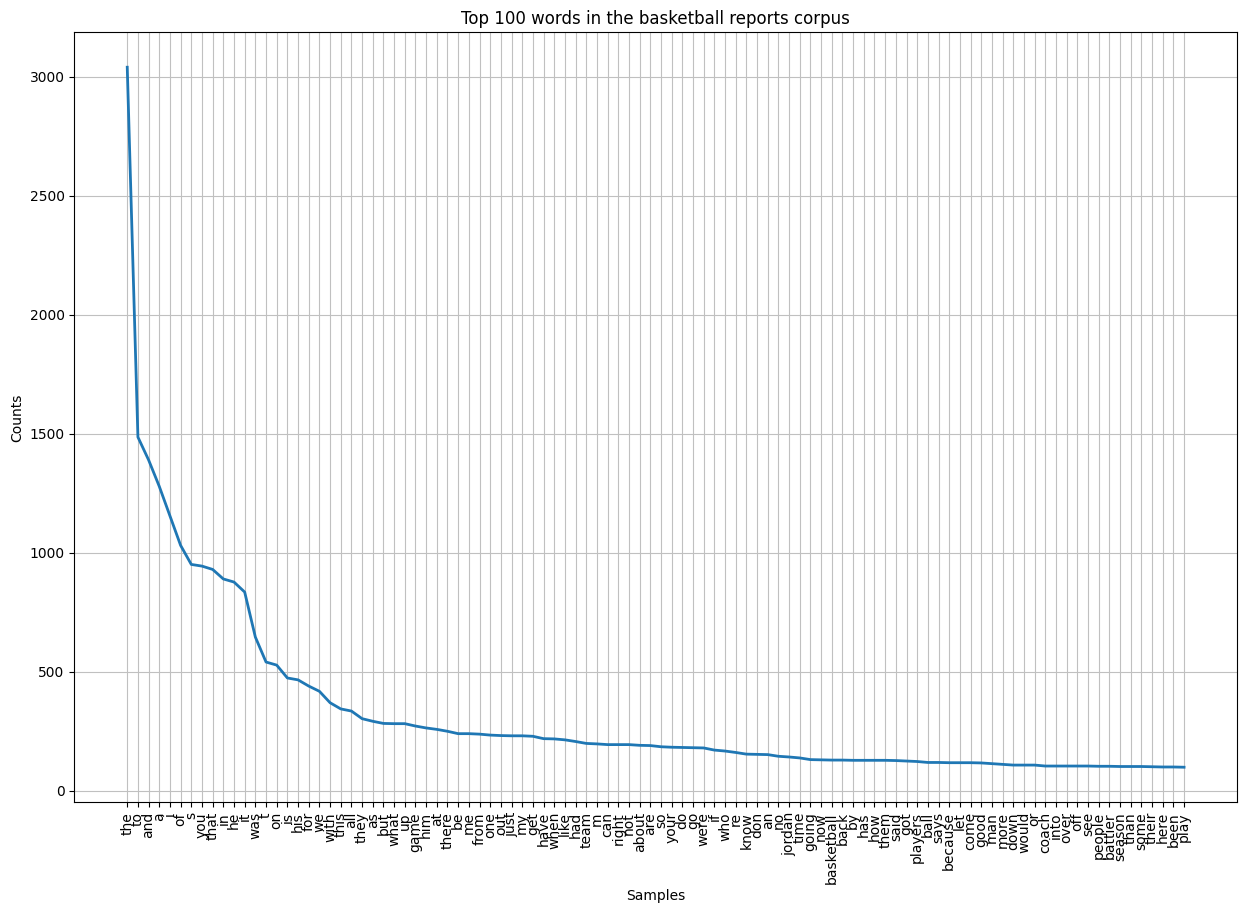

<Axes: title={'center': 'Top 100 words in the basketball reports corpus'}, xlabel='Samples', ylabel='Counts'>

In [2109]:
# plot the frequency distribution of the top 100 words
plt.figure(figsize=(15, 10))
plt.title('Top 100 words in the basketball reports corpus')
top_300_words = basketball_reports_fdist.most_common(100)
top_300_fdist = nltk.FreqDist(dict(top_300_words))
top_300_fdist.plot()

The words start from a frequency of over 3000, before gradually decreased to a frequency around 100-150, where it seems to become steady with the graph looking like it's trending exponentially. This is likely due to the limited number of words, and if I were to have a wider scope of words, there would likely be a change in trend. An interesting observation I was able to make from the graph above is that a lot of shorter words are the more frequently used ones, but one of the most frequent words is the letter 's' as words like "basketball's" split the word around the apostrophe, resulting in 's' being treated independently.

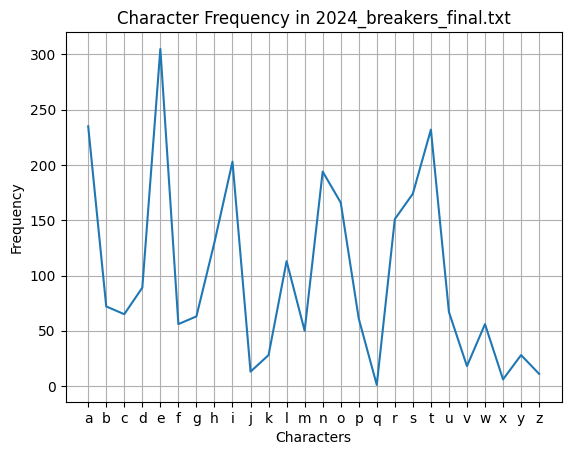

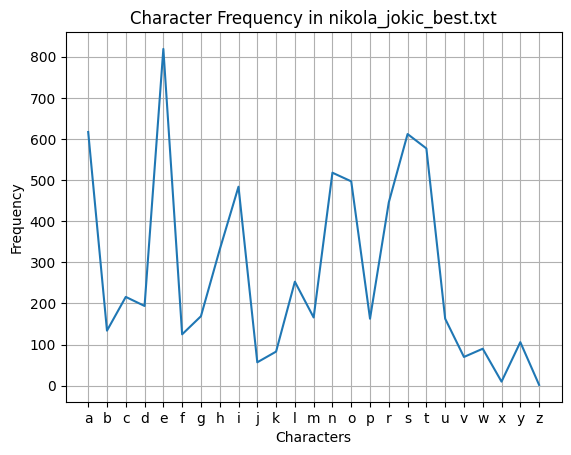

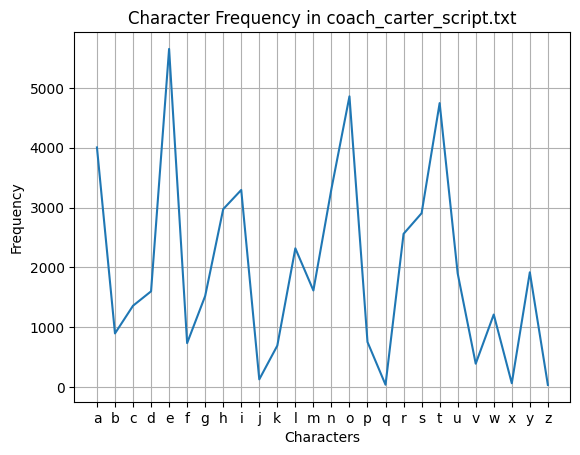

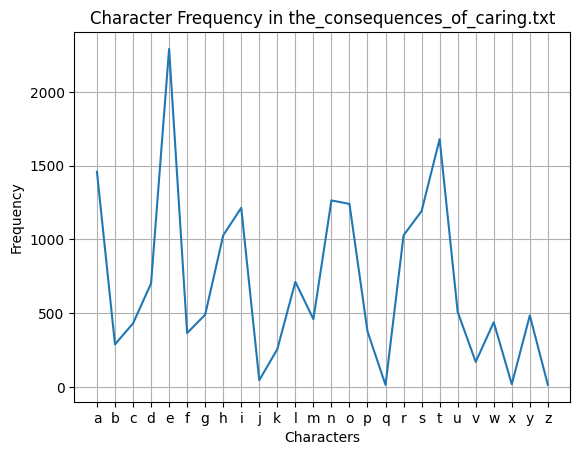

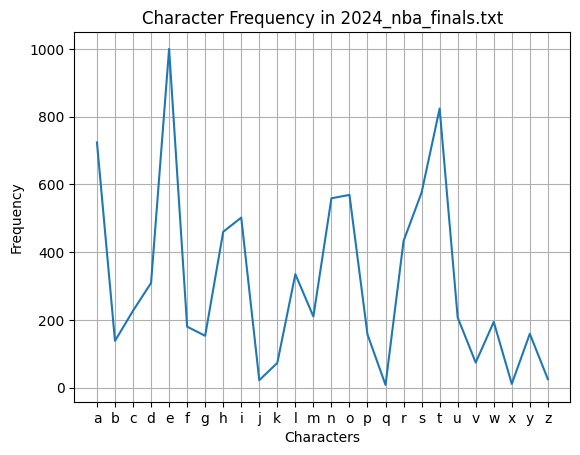

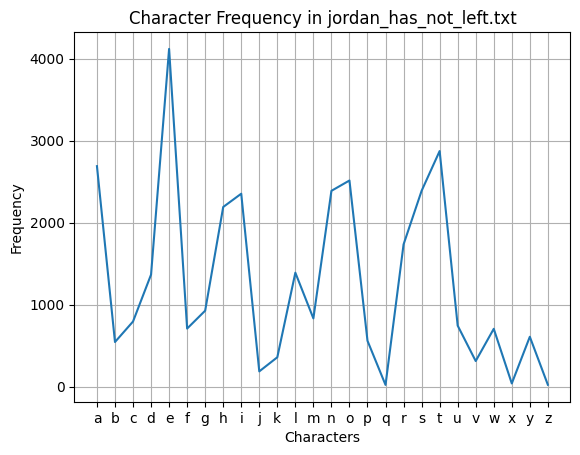

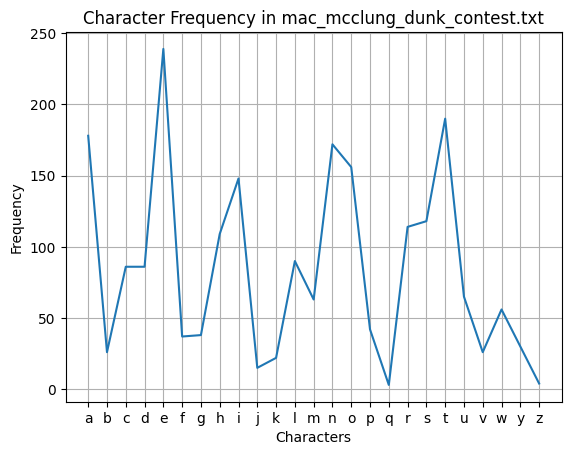

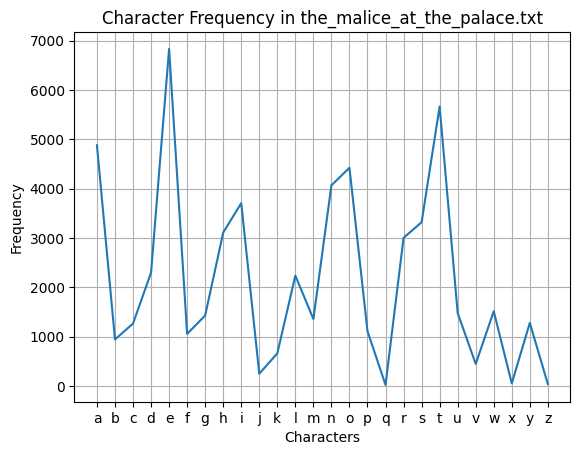

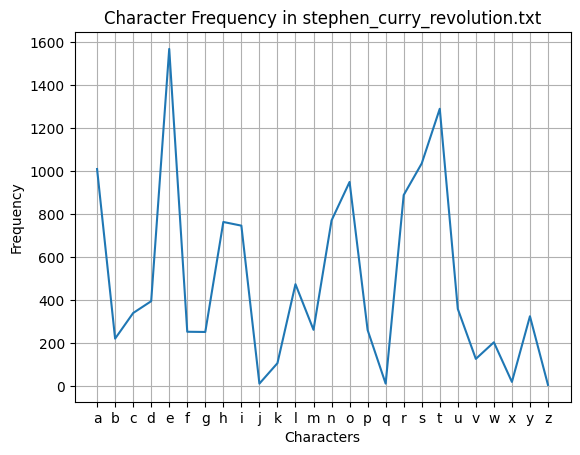

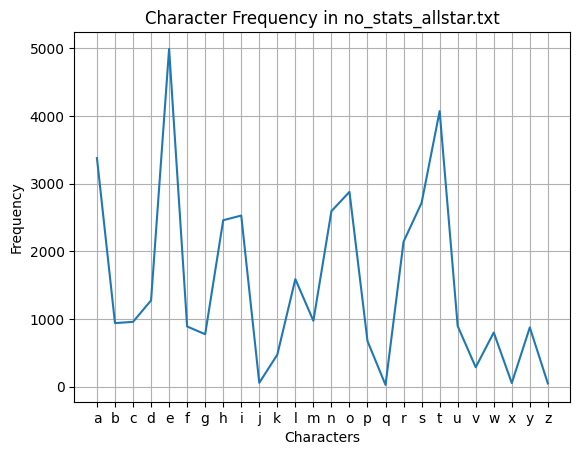

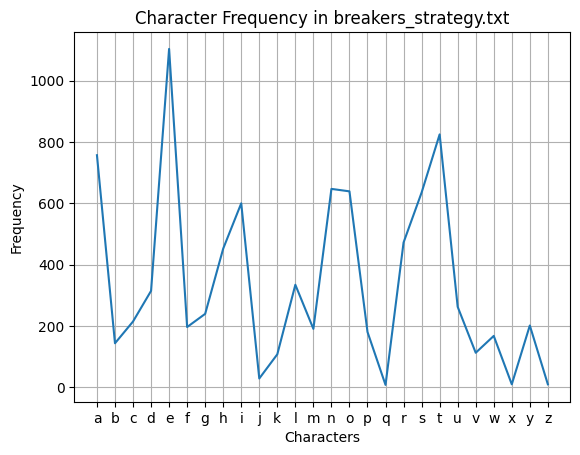

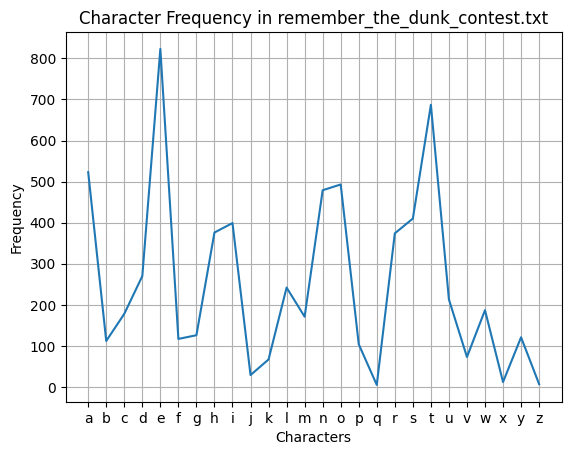

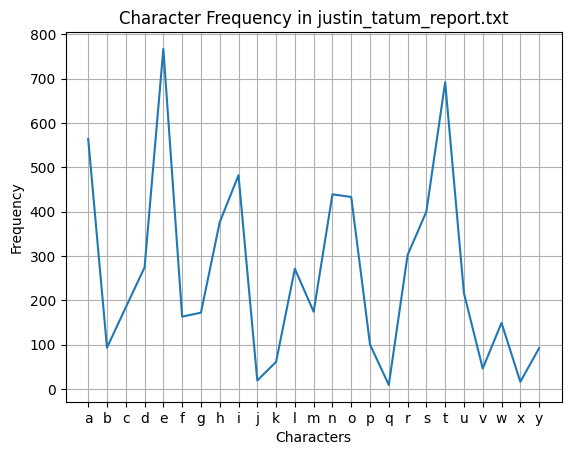

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', '', text)
    text = text.lower()
    return text

char_freqs = {}

for file_id in basketball_reports_corpus.fileids():
    basketball_reports_string = ' '.join(basketball_reports_corpus.words(file_id))
    processed_text = re.sub(r'[^a-zA-Z]', '', basketball_reports_string.lower())
    char_freq = Counter(processed_text) # get the frequency of each character
    char_freqs[file_id] = char_freq 

for file_id, char_freq in char_freqs.items():
    sorted_chars = sorted(char_freq.keys()) # sort the characters in alphabetical order
    frequencies = [char_freq[char] for char in sorted_chars] 
    plt.plot(sorted_chars, frequencies)
    plt.title(f'Character Frequency in {file_id}')
    plt.xlabel('Characters')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [2112]:
# Find bigram collocations in the corpus
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens_cleaned)
collocations = finder.nbest(bigram_measures.pmi, 10)

print("Top 10 collocations in the corpus:")
print(collocations)

Top 10 collocations in the corpus:
[('140', 'pounds'), ('1957', '58'), ('1966', '67'), ('1976', '77'), ('1980s', 'russian'), ('39th', 'ryder'), ('aahed', 'ate'), ('abdul', 'jabbar'), ('abnormally', 'unselfish'), ('abraham', 'supposedly')]


We can see that 3 of the collocations found are to do with years (e.g. 1957 58 meaning 1957 and 1958), and another is to do with weight (i.e. 140 pounds). One of the most interesting ones I see is 'abnormally unselfish' being collocated as they are both used independently as adjectives and is also known to be what defines an 'altruist'. 

### Conclusion on findings
The corpus consisted of multiple articles and movie scripts, which showed a total of 76,373 tokens with 6,957 unique types. This indicates a diverse range of vocabulary amongst the texts, which is expected given the mix of descriptive articles and dialogues from movie scripts.

The frequency distribution of words highlighted the dominance of common stopwords like 'the', 'to', 'and', 'a', and 'of'. This is typical in any English text corpus. However, when stopwords were removed, more meaningful words related to basketball, such as 'dunk', 'shots', 'jordan', and 'celtics', emerged as frequent terms. This helps to focus on the content-specific vocabulary which provides a clearer picture of the corpus' theme.

The lexical diversity analysis revealed that texts like the Coach Carter script and the Malice at the Palace report had lower diversity, likely due to their length and repetitive nature. On the other hand, shorter articles like the 2024 Breakers Final report showed higher lexical diversity, indicating a more diverse vocabulary within a smaller text.
Concordance and collocations provided deeper insights into how meaningful words are used in context and when partnered with other words; the concordance of 'shoot' showed its strong usage in a basketball context, while collocations like 'abnormally unselfish' showed interesting word pairings that could be explored further and with wider context meaning.

Overall, the analysis helped in understanding the distribution of words in the corpus. It showed how different types of texts contribute to the overall vocabulary and topic. Future directions could include adding more categories, such as youtube videos or interviews to broaden the scope. This corpus can help researchers understand language use in sports journalism and movie scripts by offering insights into how language varies across different contexts and genres. Further exploration could focus on sentiment analysis or stylistic differences between the articles and scripts.